<a href="https://colab.research.google.com/github/chkomalipriyadarshini/AI/blob/main/Dog%26Cat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train='/content/drive/https://drive.google.com/drive/my-drive'

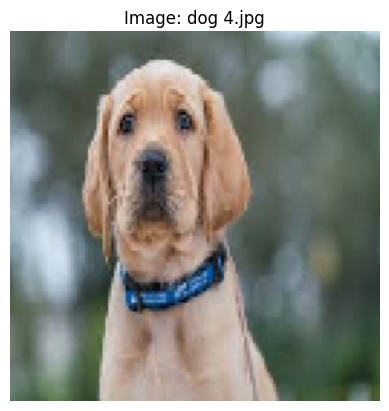

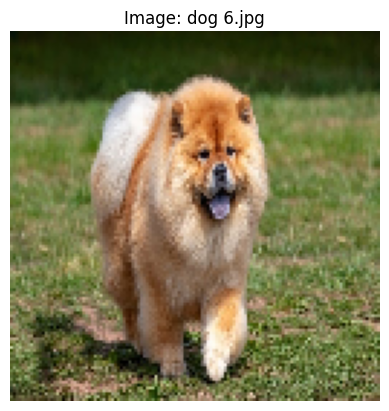

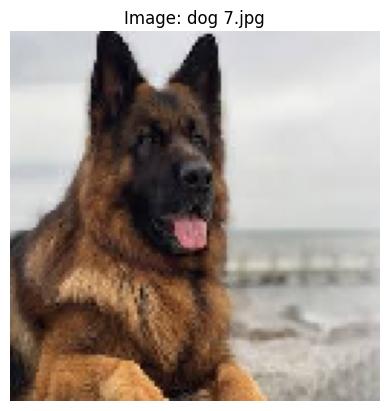

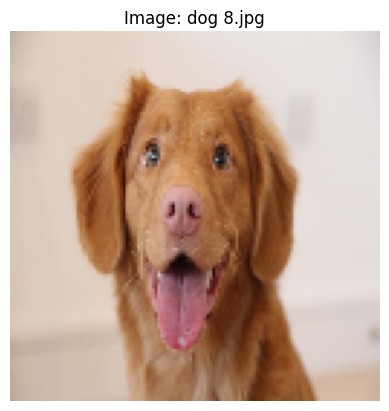

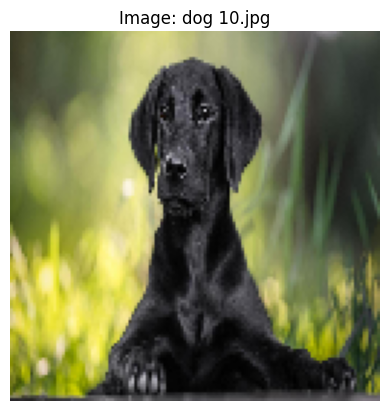

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/dataset/Train/dog'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

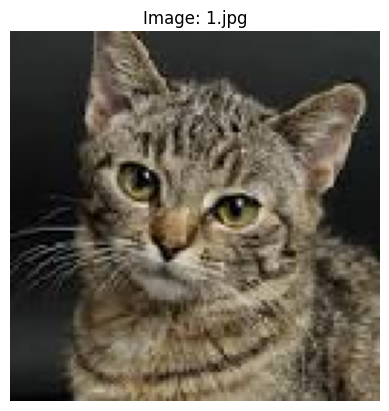

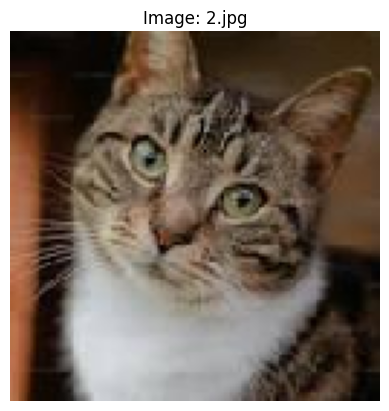

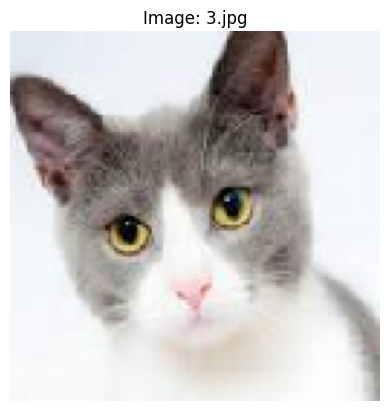

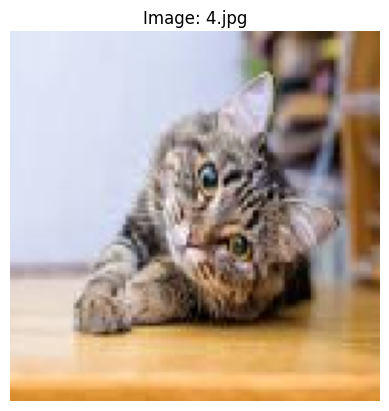

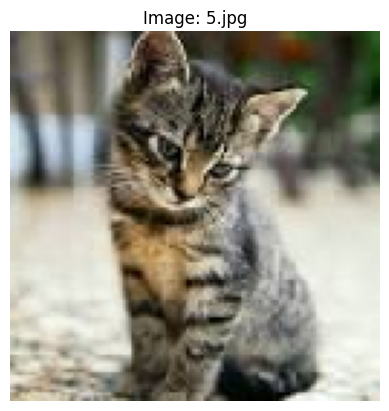

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/dataset/Train/cat'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten, RandomFlip
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
base_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (150, 150)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 92 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [ ]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save("dog_cat_classifier.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 26s 20s/step - accuracy: 0.4903 - loss: 0.7178 - val_accuracy: 0.4844 - val_loss: 0.9916
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9739

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5000 - loss: 0.9739 - val_accuracy: 0.4844 - val_loss: 0.6945
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4465 - loss: 0.7067 - val_accuracy: 0.5156 - val_loss: 0.6965
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5000 - loss: 0.7011 - val_accuracy: 0.4844 - val_loss: 0.6962
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6151 - loss: 0.6785 - val_accuracy: 0.5469 - val_loss: 0.6819
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4688 - loss: 0.7177 - val_accuracy: 0.5312 - val_loss: 0.6791
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 8s/step - accuracy: 0.4771 - loss: 0.6896 - val_accuracy: 0.6094 - val_loss: 0.6755
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 998ms/step - accuracy: 0.4688 - loss: 0.6864 - val_accuracy: 0.6562 - val_loss: 0.6728
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6127 - loss: 0.6708 - val_accuracy: 0.5938 - val_loss: 0.6582
Epoch 10/10
2/2 ━━━━━━

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("dog_cat_classifier.h5")

# Ensure the model is compiled (to avoid warnings)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prediction function
def predict_pet(img):
    # Resize image to model's expected input size
    img = img.resize((150, 150))

    # Convert to array and normalize
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Binary classification output

    # Return the class based on threshold
    if prediction >= 0.5:
        return "Dog 🐶"
    else:
        return "Cat 🐱"

# Gradio interface setup
interface = gr.Interface(
    fn=predict_pet,
    inputs=gr.Image(type="pil", label="Upload an image"),
    outputs=gr.Text(label="Prediction"),
    title="Dog vs Cat Classifier",
    description="Upload an image to detect whether it's a Dog or a Cat.",
    theme="default"
)

# Launch the app
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7b14b997f618d0cb95.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
